In [1]:
import pandas as pd
import geopandas
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("data/Data.xlsx", sheet_name='boundary')
data.head()

,NAME,Ma_Huyen,Tinh,LAT,LNG
0,Quận 1,70101,TP. Hồ Chí Minh,10.7838,106.698
1,Quận 1,70101,TP. Hồ Chí Minh,10.7807,106.695
2,Quận 1,70101,TP. Hồ Chí Minh,10.7781,106.692
3,Quận 1,70101,TP. Hồ Chí Minh,10.7748,106.689
4,Quận 1,70101,TP. Hồ Chí Minh,10.7721,106.687


In [3]:
data['Coordinates'] = list(zip(data.LNG, data.LAT))

In [4]:
data.head()

,NAME,Ma_Huyen,Tinh,LAT,LNG,Coordinates
0,Quận 1,70101,TP. Hồ Chí Minh,10.7838,106.698,"(106.698, 10.7838)"
1,Quận 1,70101,TP. Hồ Chí Minh,10.7807,106.695,"(106.695, 10.7807)"
2,Quận 1,70101,TP. Hồ Chí Minh,10.7781,106.692,"(106.692, 10.7781)"
3,Quận 1,70101,TP. Hồ Chí Minh,10.7748,106.689,"(106.689, 10.7748)"
4,Quận 1,70101,TP. Hồ Chí Minh,10.7721,106.687,"(106.687, 10.7721)"


In [5]:
data['Coordinates'] = data['Coordinates'].apply(Point)

In [6]:
data.head()

,NAME,Ma_Huyen,Tinh,LAT,LNG,Coordinates
0,Quận 1,70101,TP. Hồ Chí Minh,10.7838,106.698,POINT (106.698 10.7838)
1,Quận 1,70101,TP. Hồ Chí Minh,10.7807,106.695,POINT (106.695 10.7807)
2,Quận 1,70101,TP. Hồ Chí Minh,10.7781,106.692,POINT (106.692 10.7781)
3,Quận 1,70101,TP. Hồ Chí Minh,10.7748,106.689,POINT (106.689 10.7748)
4,Quận 1,70101,TP. Hồ Chí Minh,10.7721,106.687,POINT (106.687 10.7721)


In [7]:
gdf = geopandas.GeoDataFrame(data, geometry='Coordinates')
gdf.head()

,NAME,Ma_Huyen,Tinh,LAT,LNG,Coordinates
0,Quận 1,70101,TP. Hồ Chí Minh,10.7838,106.698,POINT (106.698 10.7838)
1,Quận 1,70101,TP. Hồ Chí Minh,10.7807,106.695,POINT (106.695 10.7807)
2,Quận 1,70101,TP. Hồ Chí Minh,10.7781,106.692,POINT (106.692 10.7781)
3,Quận 1,70101,TP. Hồ Chí Minh,10.7748,106.689,POINT (106.689 10.7748)
4,Quận 1,70101,TP. Hồ Chí Minh,10.7721,106.687,POINT (106.687 10.7721)


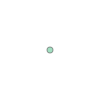

In [8]:
gdf.loc[0, 'Coordinates']

In [9]:
d = pd.read_excel("data/Data.xlsx", sheet_name='district')
d.head()

,NAME,Ma_Huyen,Tinh,LAT,LNG
0,Quận 1,70101,TP. Hồ Chí Minh,10.7755,106.698
1,Quận 2,70103,TP. Hồ Chí Minh,10.7808,106.758
2,Quận 3,70105,TP. Hồ Chí Minh,10.7803,106.681
3,Quận 4,70107,TP. Hồ Chí Minh,10.7613,106.704
4,Quận 5,70109,TP. Hồ Chí Minh,10.7571,106.669


In [10]:
d.columns

Index(['NAME', 'Ma_Huyen', 'Tinh', 'LAT', 'LNG'], dtype='object')

In [11]:
col_names =  ['Ma_Huyen', 'geometry']
my_df  = pd.DataFrame(columns = col_names)
my_df

,Ma_Huyen,geometry


In [12]:
for index, row in d.iterrows():
    list_of_points = [] 
    #lat = []
    #lng = []
    print(row['Ma_Huyen'])
    for index1, row1 in data.iterrows():
        if (row['Ma_Huyen'] == row1['Ma_Huyen']):           
            list_of_points.append((row['LAT'], row['LNG']))
            #lat.append(row['LAT'])
            #lng.append(row['LNG'])
    poly = Polygon(list_of_points)
    #poly = zip(lng,lat)    
    #poly = Polygon(poly)
    #print(poly)
    x = {'Ma_Huyen' : row['Ma_Huyen'] , 'geometry' : poly}
    new_df = pd.DataFrame(x, columns=['Ma_Huyen', 'geometry'], index=[0])
    print(type(new_df))
    my_df = my_df.append(new_df, ignore_index = True)

70101
<class 'pandas.core.frame.DataFrame'>
70103
<class 'pandas.core.frame.DataFrame'>
70105
<class 'pandas.core.frame.DataFrame'>
70107
<class 'pandas.core.frame.DataFrame'>
70109
<class 'pandas.core.frame.DataFrame'>
70111
<class 'pandas.core.frame.DataFrame'>
70113
<class 'pandas.core.frame.DataFrame'>
70115
<class 'pandas.core.frame.DataFrame'>
70117
<class 'pandas.core.frame.DataFrame'>
70119
<class 'pandas.core.frame.DataFrame'>
70121
<class 'pandas.core.frame.DataFrame'>
70123
<class 'pandas.core.frame.DataFrame'>
70125
<class 'pandas.core.frame.DataFrame'>
70127
<class 'pandas.core.frame.DataFrame'>
70129
<class 'pandas.core.frame.DataFrame'>
70131
<class 'pandas.core.frame.DataFrame'>
70133
<class 'pandas.core.frame.DataFrame'>
70135
<class 'pandas.core.frame.DataFrame'>
70137
<class 'pandas.core.frame.DataFrame'>
70139
<class 'pandas.core.frame.DataFrame'>
70141
<class 'pandas.core.frame.DataFrame'>
70143
<class 'pandas.core.frame.DataFrame'>


In [13]:
my_df.head()

,Ma_Huyen,geometry
0,70101,"POLYGON ((10.7755 106.698, 10.7755 106.698, 10..."
1,70103,"POLYGON ((10.7808 106.758, 10.7808 106.758, 10..."
2,70105,"POLYGON ((10.7803 106.681, 10.7803 106.681, 10..."
3,70107,"POLYGON ((10.7613 106.704, 10.7613 106.704, 10..."
4,70109,"POLYGON ((10.7571 106.669, 10.7571 106.669, 10..."


In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
NAME        22 non-null object
Ma_Huyen    22 non-null int64
Tinh        22 non-null object
LAT         22 non-null float64
LNG         22 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 960.0+ bytes


In [15]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
Ma_Huyen    22 non-null object
geometry    22 non-null object
dtypes: object(2)
memory usage: 432.0+ bytes


In [16]:
my_df['Ma_Huyen'] = my_df['Ma_Huyen'].astype(int)

In [17]:
df_new = pd.merge(d, my_df, how='inner')

In [18]:
df_new

,NAME,Ma_Huyen,Tinh,LAT,LNG,geometry
0,Quận 1,70101,TP. Hồ Chí Minh,10.7755,106.698,"POLYGON ((10.7755 106.698, 10.7755 106.698, 10..."
1,Quận 2,70103,TP. Hồ Chí Minh,10.7808,106.758,"POLYGON ((10.7808 106.758, 10.7808 106.758, 10..."
2,Quận 3,70105,TP. Hồ Chí Minh,10.7803,106.681,"POLYGON ((10.7803 106.681, 10.7803 106.681, 10..."
3,Quận 4,70107,TP. Hồ Chí Minh,10.7613,106.704,"POLYGON ((10.7613 106.704, 10.7613 106.704, 10..."
4,Quận 5,70109,TP. Hồ Chí Minh,10.7571,106.669,"POLYGON ((10.7571 106.669, 10.7571 106.669, 10..."
5,Quận 6,70111,TP. Hồ Chí Minh,10.7458,106.638,"POLYGON ((10.7458 106.638, 10.7458 106.638, 10..."
6,Quận 7,70113,TP. Hồ Chí Minh,10.7456,106.728,"POLYGON ((10.7456 106.728, 10.7456 106.728, 10..."
7,Quận 8,70115,TP. Hồ Chí Minh,10.7227,106.629,"POLYGON ((10.7227 106.629, 10.7227 106.629, 10..."
8,Quận 9,70117,TP. Hồ Chí Minh,10.8295,106.814,"POLYGON ((10.8295 106.814, 10.8295 106.814, 10..."
9,Quận 10,70119,TP. Hồ Chí Minh,10.7732,106.669,"POLYGON ((10.7732 106.669, 10.7732 106.669, 10..."


In [19]:
type(df_new['geometry'])

pandas.core.series.Series

In [20]:
import geopandas as gpd

In [21]:
df_new_crs = {'init':'epsg:4326'}  
df_new_geo = gpd.GeoDataFrame(df_new, crs = df_new_crs, geometry = df_new.geometry)
type(df_new_geo)

geopandas.geodataframe.GeoDataFrame

In [22]:
type(df_new_geo.geometry)

geopandas.geoseries.GeoSeries

In [23]:
df_new_geo.head()

,NAME,Ma_Huyen,Tinh,LAT,LNG,geometry
0,Quận 1,70101,TP. Hồ Chí Minh,10.7755,106.698,"POLYGON ((10.7755 106.698, 10.7755 106.698, 10..."
1,Quận 2,70103,TP. Hồ Chí Minh,10.7808,106.758,"POLYGON ((10.7808 106.758, 10.7808 106.758, 10..."
2,Quận 3,70105,TP. Hồ Chí Minh,10.7803,106.681,"POLYGON ((10.7803 106.681, 10.7803 106.681, 10..."
3,Quận 4,70107,TP. Hồ Chí Minh,10.7613,106.704,"POLYGON ((10.7613 106.704, 10.7613 106.704, 10..."
4,Quận 5,70109,TP. Hồ Chí Minh,10.7571,106.669,"POLYGON ((10.7571 106.669, 10.7571 106.669, 10..."


In [26]:
df_new_geo['geometry']

0     POLYGON ((10.7755 106.698, 10.7755 106.698, 10...
1     POLYGON ((10.7808 106.758, 10.7808 106.758, 10...
2     POLYGON ((10.7803 106.681, 10.7803 106.681, 10...
3     POLYGON ((10.7613 106.704, 10.7613 106.704, 10...
4     POLYGON ((10.7571 106.669, 10.7571 106.669, 10...
5     POLYGON ((10.7458 106.638, 10.7458 106.638, 10...
6     POLYGON ((10.7456 106.728, 10.7456 106.728, 10...
7     POLYGON ((10.7227 106.629, 10.7227 106.629, 10...
8     POLYGON ((10.8295 106.814, 10.8295 106.814, 10...
9     POLYGON ((10.7732 106.669, 10.7732 106.669, 10...
10    POLYGON ((10.7665 106.648, 10.7665 106.648, 10...
11    POLYGON ((10.862 106.66, 10.862 106.66, 10.862...
12    POLYGON ((10.8359 106.666, 10.8359 106.666, 10...
13    POLYGON ((10.7981 106.642, 10.7981 106.642, 10...
14    POLYGON ((10.8132 106.717, 10.8132 106.717, 10...
15    POLYGON ((10.8015 106.679, 10.8015 106.679, 10...
16    POLYGON ((10.8597 106.74, 10.8597 106.74, 10.8...
17    POLYGON ((11.0383 106.506, 11.0383 106.506

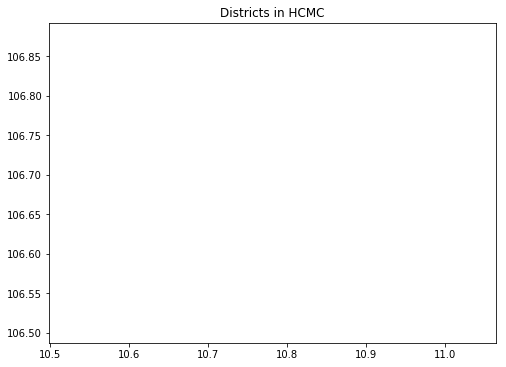

In [25]:
df_new_geo.plot(column = 'NAME', figsize=(8,8))
plt.title('Districts in HCMC')
plt.show()